In [3]:
import pandas as pd
import numpy as np
import os , json
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
import pickle

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)


In [4]:
#  Developing code on sample data - have memory constraints
with open('test.data.sample.jsons') as f:
    df = pd.DataFrame(json.loads(line) for line in f)

In [5]:
# type(df.c6[0][0])
#print(df.head())

In [7]:
# To deal with C6 & C9, I choose to convert all feature into dummy variable and then select the best features.
# But this give me more than 12K columns. Becoz I dont have the interepetation of variable I can not perform some rare omission
# along with OHE.

# Other idea which I have is to sort each array and concat all the values and then create the label encoding for that column.
# This approach will not yeild to higher column but I am doubtfull weather such model will be able
#  to explain unseen combination of features for C6 & C9 so not opted this approach

# Creating OHE - dummy variables for c6 to c9
dc6=pd.get_dummies(df.c6.apply(pd.Series).stack(),prefix='c6').sum(level=0)
dc9=pd.get_dummies(df.c9.apply(pd.Series).stack(),prefix='c9').sum(level=0)



In [83]:
# Column Binding
df_bind = pd.concat([df['l'].reset_index(drop=True),dfle.reset_index(drop=True), dc6.reset_index(drop=True),dc9.reset_index(drop=True)], axis=1)
# df_bind = pd.concat([df['l'].reset_index(drop=True),dfle.reset_index(drop=True)], axis=1)


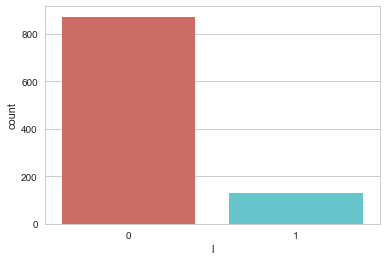

In [104]:
sns.countplot(x=df_bind['l'],data=df_bind, palette='hls')
plt.show()

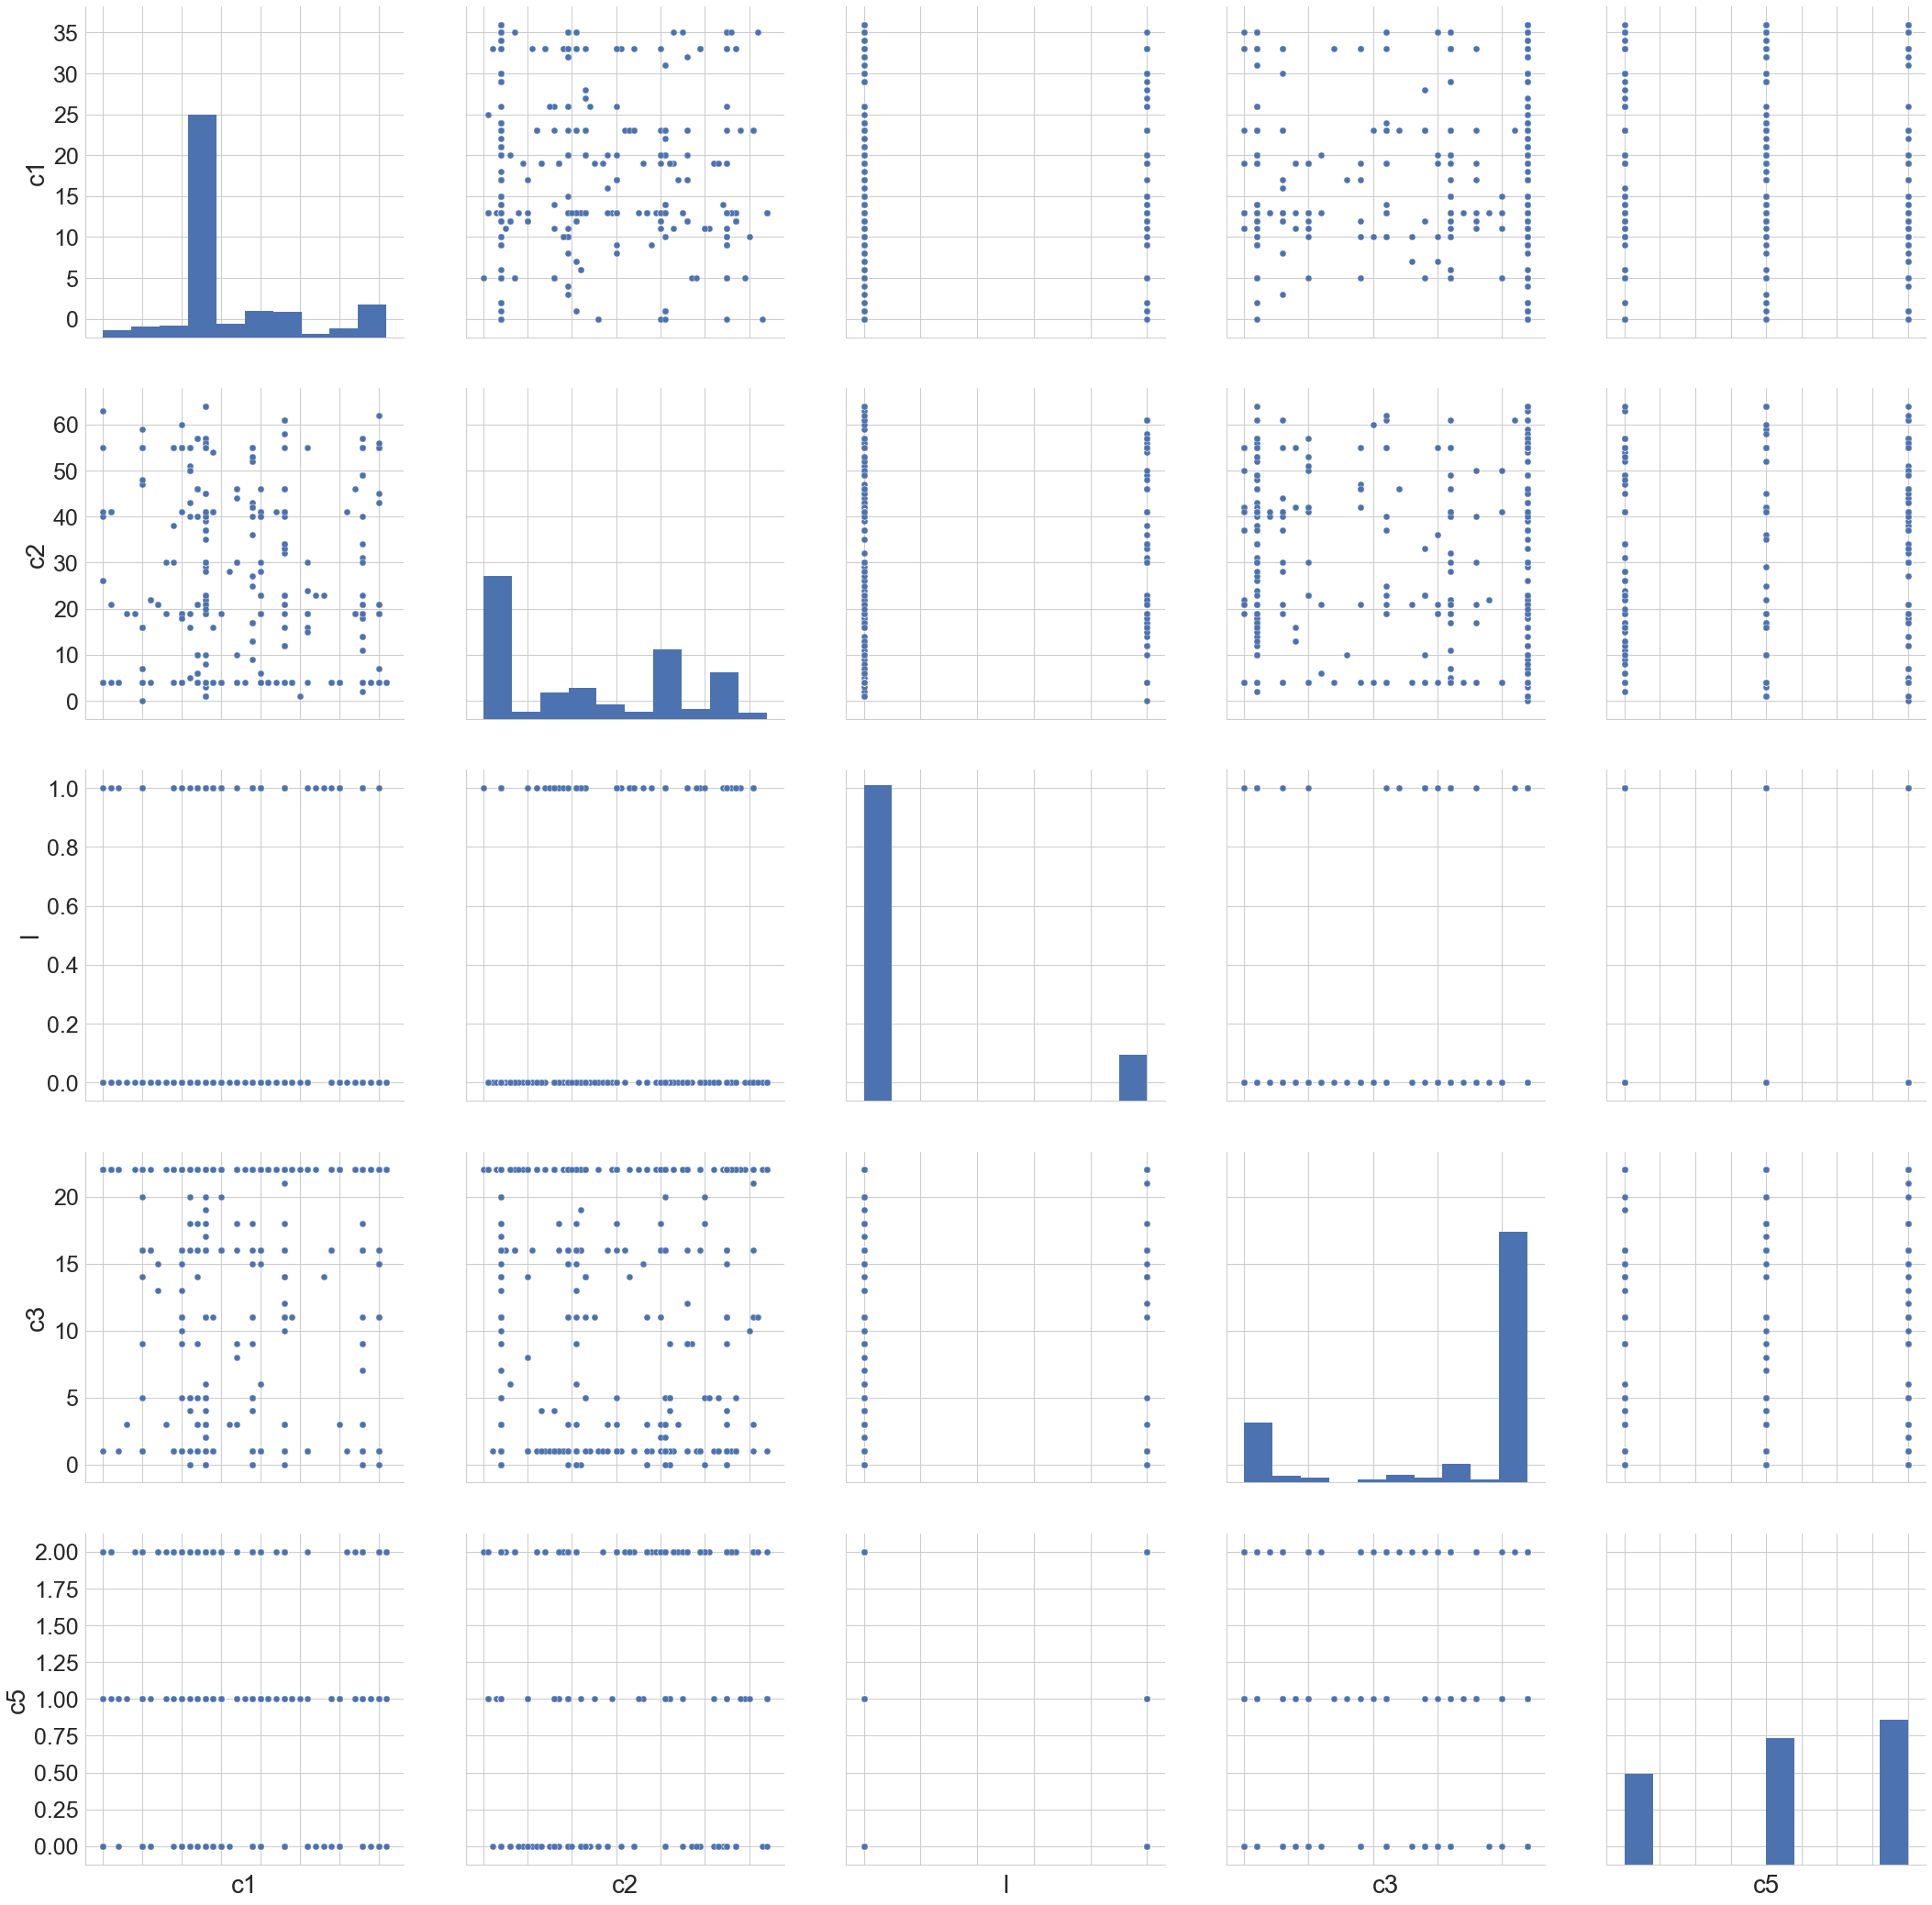

In [100]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df_bind[['c1','c2','l','c3','c5print(log_loss(y_test,y_pred))']], 
                  palette='tab20',size=6)
g.set(xticklabels=[]);

In [15]:
# sanity checks
dc6.loc[dc6['c6_-1841755489.0'] == 1]['c6_-1841755489.0']
df_bind.loc[df_bind['c6_-1841755489.0'] == 1]['c6_-1841755489.0']
df_bind.groupby(['l']).agg(['count'])
df_bind.shape


(1000, 9)

In [127]:
# Tried many methods to select the fearure from merged datadet but my system is not supporting. Taking lot of time and crashing

from sklearn.decomposition import FactorAnalysis
factordf=pd.concat([dc6.reset_index(drop=True),dc9.reset_index(drop=True)], axis=1)
factordf=factordf.dropna()
factor=FactorAnalysis().fit(factordf)


In [135]:
# df_factored=pd.DataFrame(factor.components_,factordf.columns)

In [63]:
# Preparing Feature for c6 and c9
df_na = df_bind.dropna()
X=factordf
y=df_na['l']


In [ ]:
# Feature Selection using SelectKBest
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)

In [85]:
# Preparing Feature for rest variables other than c6 and c9
df_na = df_bind.dropna()
X=df_na.drop(['l'], axis=1)
y=df_na['l']


In [87]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: l, dtype: int64

In [58]:
# Feature Selection using SelectKBest
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
X=pd.concat([df_na['c0'].reset_index(drop=True),df_na['c4'].reset_index(drop=True),df_na['c8'].reset_index(drop=True)], axis=1)


In [88]:
# Feature Selection using RFE giving better P values
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
# print(rfe.support_)
# print(rfe.ranking_)

[False False False ... False False False]
[7951 7633 7878 ... 2575 2048 6979]


In [65]:
X=pd.concat([df_na['c1'].reset_index(drop=True),df_na['c3'].reset_index(drop=True),df_na['c5'].reset_index(drop=True)], axis=1)

In [66]:
X.shape

(1000, 3)

In [67]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.390207
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      l   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Sun, 27 May 2018   Pseudo R-squ.:                -0.01997
Time:                        00:24:35   Log-Likelihood:                -390.21
converged:                       True   LL-Null:                       -382.57
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c1            -0.0289      0.008     -3.466      0.001      -0.045      -0.013
c3            -0.0597      0.

In [68]:
# Logistic Regression Model Fitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
# TODO: refactor modularization, call methods by parameters

# Saving the model for periodic run
import pickle
period='q1_2018' #get the period from config or db to uniquely generate the model
modelname='logisticadclassifier'+period+'.pickle'
with open(modelname,'wb') as f:
    pickle.dump(logreg,f)

In [99]:
# check weather model is existed to predict, if yes get the model from disk
model_in = open(modelname,'rb')
logreg = pickle.load(model_in)

In [69]:
# Predicting the test set results and calculating the accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [70]:
# Cross Validation to avoid Overfitting
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.866


In [71]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[266   0]
 [ 34   0]]


In [72]:
#Meetrics Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94       266
          1       0.00      0.00      0.00        34

avg / total       0.79      0.89      0.83       300



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


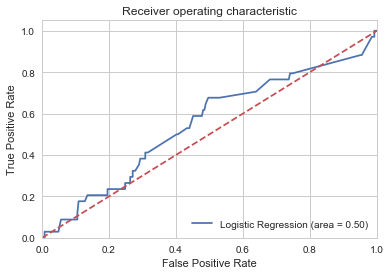

In [73]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [103]:
from sklearn.metrics import log_loss
print(log_loss(y_test,y_pred))

3.9143946580898774
